In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
# import TwoLayerNN class from the other notebook
import import_ipynb
import Class_TwoLayerNN

#### The task : Classify dataset using the network that we build in the "Class_TwoLayerNN.ipynb" file

In [10]:
# We draw 250 uniformly distributed points in R^2 with norm  ≤ 1 and label them by yi = −1, and then another
# 250 uniformly distributed points x^i in R2 with norm between 1 and 2 and label them by yi = 1.

n = 250

#dataset
p = np.zeros((n,2))
lenght = np.sqrt(np.random.uniform(0, 1,n)) 
angle = np.pi*np.random.uniform(0, 2,n)     
p[:,0] = lenght*np.cos(angle)
p[:,1] = lenght*np.sin(angle)

q = np.zeros((n,2))
lenght = np.sqrt(np.random.uniform(1, 4,n))  
angle = np.pi*np.random.uniform(0, 2,n)
q[:,0] = lenght*np.cos(angle)
q[:,1] = lenght*np.sin(angle)

X = np.concatenate((p,q))

#labels
y_1 = - np.ones(p.shape[0])
y_2 = np.ones(q.shape[0])
y = np.concatenate((y_1,y_2))

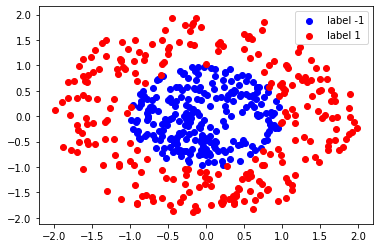

In [11]:
plt.scatter(p[:,0],p[:,1],color='blue')
plt.scatter(q[:,0],q[:,1],color='red')
plt.legend(('label -1','label 1'))

In [12]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.1)
x_trainval, x_val, y_trainval, y_val=train_test_split(x_train,y_train,test_size=0.1)

In [14]:
# hyperparameters tuning

best_score = 0

hidden_neurons = np.arange(5,15)
learning_rates = [0.05, 0.1, 0,15] 
minibatch_sizes = [10, 20, 30]
iterations = [40000, 45000, 50000] 

for hidden_neuron in hidden_neurons :
    for learning_rate in learning_rates :
        for minibatch_size in minibatch_sizes :
            for iteration in iterations : 

                # the model
                nn = Class_TwoLayerNN.TwoLayerNN(2,hidden_neuron)    
                # train the model
                nn.sgd(x_trainval, y_trainval, learning_rate, minibatch_size,iteration) 
                # accuracy over validation set
                score = accuracy_score(y_val , np.where(nn.feedForward(x_val) >0,1,-1)  )

                if score > best_score :
                    best_score = score
                    opt_param = {'hidden_neurons' : hidden_neuron,
                                'learning_rate' : learning_rate,
                                'minibatch_size' : minibatch_size,
                                'iterations' : iteration}



C:\Users\Vaggelis\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
C:\Users\Vaggelis\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [15]:
print('The optimal parameters are ', opt_param)
# final model
model = Class_TwoLayerNN.TwoLayerNN(2, opt_param['hidden_neurons'])
# training
model.sgd(x_train,y_train,opt_param['learning_rate'],opt_param['minibatch_size'],opt_param['iterations'])
# accuracy over the useen data of the test set
model_score = accuracy_score(y_test , np.where(model.feedForward(x_test) >0,1,-1)  )

The optimal parameters are  {'hidden_neurons': 13, 'learning_rate': 0.05, 'minibatch_size': 30, 'iterations': 50000}


In [16]:
model_score

0.98

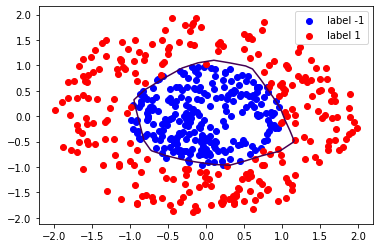

In [17]:
# plotting the classifier

plt.figure()
    
#scatter plot of data
plt.scatter(p[:,0],p[:,1],color='blue')
plt.scatter(q[:,0],q[:,1],color='red')
plt.legend(('label -1','label 1'))

#contour line of learned classifier
x_min = X[:,0].min()
y_min = X[:,1].min()
x_max = X[:,0].max()
y_max = X[:,1].max()

u = np.linspace(x_min,x_max, 20)
v = np.linspace(y_min,y_max, 20)
xx, yy = np.meshgrid(u,v) 
xx_line = np.resize(xx,(20**2,1))
yy_line = np.resize(yy,(20**2,1))         
t = np.concatenate((xx_line,yy_line), axis = 1)
z_pre=model.feedForward(t)
z_post = np.resize(z_pre,(20,20))  
plt.contour(xx,yy,z_post, levels = [0])